In [143]:
!pip install mlxtend

In [144]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import joypy
import re #not a coding language but allows you to find patterns 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 
import networkx as nx
import openpyxl

In [145]:
# Global definitions
baseFolder = os.getcwd()
exportsFolder = baseFolder + os.sep +'Exports' + os.sep

In [146]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

In [147]:
# Load data 
ds = pd.read_excel('EuropeTop100Attractions_ENG_20190101_20210821.xlsx', engine='openpyxl')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92120 entries, 0 to 92119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            92120 non-null  object        
 1   extractionDate     92120 non-null  datetime64[ns]
 2   globalRating       92120 non-null  float64       
 3   positionOnRanking  92120 non-null  int64         
 4   sitesOnRanking     92120 non-null  int64         
 5   totalReviews       92120 non-null  int64         
 6   userName           92100 non-null  object        
 7   userLocation       78652 non-null  object        
 8   userContributions  92120 non-null  int64         
 9   tripType           63052 non-null  object        
 10  reviewWritten      92120 non-null  datetime64[ns]
 11  reviewVisited      91410 non-null  datetime64[ns]
 12  reviewRating       92120 non-null  int64         
 13  reviewLanguage     92120 non-null  object        
 14  review

In [148]:
# Summary statistics for all variables
ds.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,92120,100,MAG001,8309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,92120,NaN,NaN,NaN,2021-08-20 22:09:20.598932992,2021-08-20 08:24:40.077000,2021-08-20 12:08:10.831000064,2021-08-20 15:46:58.171000064,2021-08-21 12:35:39.817250048,2021-08-21 16:27:17.026000,NaN
globalRating,92120.0,NaN,NaN,NaN,4.485166,4.0,4.5,4.5,4.5,5.0,0.178085
positionOnRanking,92120.0,NaN,NaN,NaN,3.91459,1.0,1.0,2.0,6.0,55.0,4.843013
sitesOnRanking,92120.0,NaN,NaN,NaN,748.263537,5.0,154.0,484.0,1186.0,3837.0,802.742304
totalReviews,92120.0,NaN,NaN,NaN,40556.601813,5179.0,14152.0,24454.0,51324.0,163828.0,42914.381014
userName,92100,65785,Malgorzata@Margo7850p,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,78652,12613,"London, UK",3710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,92120.0,NaN,NaN,NaN,477.52056,0.0,20.0,66.0,215.0,607732.0,7270.518677
tripType,63052,5,Couples,31702,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
# Check products cardinality
usernameCount = ds['userName'].value_counts()
usernameCount

Malgorzata@Margo7850p                    31
KodoDrummer@KodoDrummer                  24
Michele Amico🇮🇹🇮🇹🇮🇹🇮🇹@micheleaQ8239JH    19
packcal@packcal                          17
Dimitris L@750dimitrisl                  17
                                         ..
Mogoshadi S@mogoshadis                    1
Crystal Chris@CrystalPistol007            1
Grantley@GrantleyMorgan                   1
Burnsfun@Burnsfun                         1
czlido@czlido                             1
Name: userName, Length: 65785, dtype: int64

In [150]:
# Check products cardinality
userlocationCount = ds['userLocation'].value_counts()
userlocationCount

London, UK                 3710
Melbourne, Australia        773
Sydney, Australia           736
New York City, NY           699
Toronto, Canada             567
                           ... 
Teresopolis, RJ               1
Pittsworth, Australia         1
Scone, Australia              1
Berea, OH                     1
Elburg, The Netherlands       1
Name: userLocation, Length: 12613, dtype: int64

In [151]:
# Check products cardinality
tripTypeCount = ds['tripType'].value_counts()
tripTypeCount

Couples     31702
Family      13596
Friends     11759
Solo         5127
Business      868
Name: tripType, dtype: int64

In [152]:
#identify duplicate rows
duplicateRows = ds[ds.duplicated()]

In [153]:
#view duplicate rows
duplicateRows

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText


In [154]:
## figuring out if we can remove the outliers
ds['positionOnRanking'].value_counts()

1     38547
2     12821
3     11549
7      7026
8      5668
11     2885
4      2834
10     2362
6      2282
5      2223
12     1097
24      806
9       710
31      595
16      312
19      243
55      160
Name: positionOnRanking, dtype: int64

In [155]:
# removing rows from position on ranking 
ds =ds[ds['positionOnRanking']<=12]

In [156]:
ds['positionOnRanking'].value_counts()

1     38547
2     12821
3     11549
7      7026
8      5668
11     2885
4      2834
10     2362
6      2282
5      2223
12     1097
9       710
Name: positionOnRanking, dtype: int64

In [157]:
# checking for missing data,  creating bool series for missing data
bool_series = pd.isnull(ds['userLocation'])


In [158]:
# filtering data
# displaying data only with location = NaN
ds[bool_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...
6,MAG001,2021-08-20 08:24:40.190,4.5,1,1186,163828,Edwin R@edwinrL7667XX,NaN,4,NaN,2021-08-14,2021-08-01,5,en,"My 2nd trip to Barcelona, but 1st time inside ..."
9,MAG001,2021-08-20 08:24:40.272,4.5,1,1186,163828,Susan A@C9769QCsusana,NaN,4,NaN,2021-08-11,2021-08-01,5,en,I ordered up a short day trip for my daughter ...
18,MAG001,2021-08-20 08:24:46.140,4.5,1,1186,163828,Resort714982@Resort714982,NaN,3,NaN,2021-07-22,2021-07-01,5,en,"its unreal, a fairytale, you keep looking at a..."
19,MAG001,2021-08-20 08:24:46.152,4.5,1,1186,163828,Jojo in Spain@JojoinSpain,NaN,2,NaN,2021-07-21,2021-07-01,5,en,Visit at the earliest or latest ties of daylig...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92050,MAG099,2021-08-21 16:26:27.447,5.0,1,73,5345,Ines@inesbudding,NaN,3,Solo,2019-06-05,2019-05-01,5,en,I think the place Stanislas is the most beauti...
92080,MAG100,2021-08-21 16:26:53.381,4.5,11,677,5179,Hannah L@hannahlS3100LD,NaN,1,NaN,2020-02-10,2020-01-01,1,en,"Stay away, Florence is a dangerous city. I was..."
92081,MAG100,2021-08-21 16:26:53.481,4.5,11,677,5179,domodosila@donosiaul,NaN,3,Family,2019-12-28,2019-12-01,5,en,no one to manage the queue n messy ! these 2 g...
92111,MAG100,2021-08-21 16:27:11.424,4.5,11,677,5179,Ilona E@ilonae244,NaN,23,Couples,2019-04-26,2019-04-01,5,en,We fell in love with this beautiful Italian ci...


In [159]:
#Use the modal value to replace missing data in userLocation
ds['userLocation'].replace([np.nan], ds['userLocation'].mode()[0], inplace=True)
print(ds)

      localID          extractionDate  globalRating  positionOnRanking  \
0      MAG001 2021-08-20 08:24:40.077           4.5                  1   
1      MAG001 2021-08-20 08:24:40.097           4.5                  1   
2      MAG001 2021-08-20 08:24:40.117           4.5                  1   
3      MAG001 2021-08-20 08:24:40.147           4.5                  1   
4      MAG001 2021-08-20 08:24:40.159           4.5                  1   
...       ...                     ...           ...                ...   
92115  MAG100 2021-08-21 16:27:11.795           4.5                 11   
92116  MAG100 2021-08-21 16:27:11.893           4.5                 11   
92117  MAG100 2021-08-21 16:27:11.993           4.5                 11   
92118  MAG100 2021-08-21 16:27:12.086           4.5                 11   
92119  MAG100 2021-08-21 16:27:17.026           4.5                 11   

       sitesOnRanking  totalReviews                   userName  \
0                1186        163828      Maur

In [160]:
# display data where location previously = NaN
ds[bool_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,"London, UK",7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...
6,MAG001,2021-08-20 08:24:40.190,4.5,1,1186,163828,Edwin R@edwinrL7667XX,"London, UK",4,NaN,2021-08-14,2021-08-01,5,en,"My 2nd trip to Barcelona, but 1st time inside ..."
9,MAG001,2021-08-20 08:24:40.272,4.5,1,1186,163828,Susan A@C9769QCsusana,"London, UK",4,NaN,2021-08-11,2021-08-01,5,en,I ordered up a short day trip for my daughter ...
18,MAG001,2021-08-20 08:24:46.140,4.5,1,1186,163828,Resort714982@Resort714982,"London, UK",3,NaN,2021-07-22,2021-07-01,5,en,"its unreal, a fairytale, you keep looking at a..."
19,MAG001,2021-08-20 08:24:46.152,4.5,1,1186,163828,Jojo in Spain@JojoinSpain,"London, UK",2,NaN,2021-07-21,2021-07-01,5,en,Visit at the earliest or latest ties of daylig...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92050,MAG099,2021-08-21 16:26:27.447,5.0,1,73,5345,Ines@inesbudding,"London, UK",3,Solo,2019-06-05,2019-05-01,5,en,I think the place Stanislas is the most beauti...
92080,MAG100,2021-08-21 16:26:53.381,4.5,11,677,5179,Hannah L@hannahlS3100LD,"London, UK",1,NaN,2020-02-10,2020-01-01,1,en,"Stay away, Florence is a dangerous city. I was..."
92081,MAG100,2021-08-21 16:26:53.481,4.5,11,677,5179,domodosila@donosiaul,"London, UK",3,Family,2019-12-28,2019-12-01,5,en,no one to manage the queue n messy ! these 2 g...
92111,MAG100,2021-08-21 16:27:11.424,4.5,11,677,5179,Ilona E@ilonae244,"London, UK",23,Couples,2019-04-26,2019-04-01,5,en,We fell in love with this beautiful Italian ci...


In [161]:
# checking for missing data review visited,  creating bool series for missing data
dv_series = pd.isnull(ds['reviewVisited'])

In [162]:
ds[dv_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
78,MAG001,2021-08-20 08:25:18.941,4.5,1,1186,163828,thomas@thomasphunos,"Manchester, UK",1,NaN,2020-09-25,NaT,4,en,"Amazing place , now a days it was not very qui..."
624,MAG001,2021-08-20 08:30:40.273,4.5,1,1186,163828,Paolo616616@Paolo616616,"Prague, Czech Republic",284,NaN,2020-02-03,NaT,5,en,"Beautiful unfinished building, should be compl..."
841,MAG001,2021-08-20 08:33:01.027,4.5,1,1186,163828,StevenK@stevenkoh9999,"Singapore, Singapore",172,NaN,2020-01-08,NaT,5,en,A lifetime of designing and planning by the ar...
850,MAG001,2021-08-20 08:33:06.518,4.5,1,1186,163828,Margarita@Margaritano,Europe,18,NaN,2020-01-07,NaT,4,en,Everybody suggest Sagrada Familia. I loved the...
3183,MAG001,2021-08-20 08:55:30.759,4.5,1,1186,163828,Andrew Jones@wigan1969,"London, UK",2,NaN,2019-09-05,NaT,1,en,"Nice to look at from the outside, however I ha..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89332,MAG087,2021-08-21 15:58:48.146,4.0,1,5,6182,Jo P@I4996RBjoannap,"Brough, UK",343,NaN,2019-07-31,NaT,5,en,Plenty to walk around and see and you can walk...
89338,MAG087,2021-08-21 15:58:48.682,4.0,1,5,6182,GMcC73@GMcC73,"Cork, Ireland",36,NaN,2019-07-28,NaT,4,en,We spent a really enjoyable 4 hours there with...
89339,MAG087,2021-08-21 15:58:48.774,4.0,1,5,6182,CWXXXJH@CWXXXJH,"Berkhamsted, UK",46,NaN,2019-07-22,NaT,5,en,Well worth signing up for one of the twice dai...
89347,MAG087,2021-08-21 15:58:54.396,4.0,1,5,6182,Lala L@LalaL827,"Alrewas, UK",87,NaN,2019-07-10,NaT,3,en,"I cycled here in the morning, came off the mai..."


In [163]:
#Use the modal value to replace missing data in reviewvisited
ds['reviewVisited'].replace([np.nan], ds['reviewVisited'].mode()[0], inplace=True)

In [164]:
ds[dv_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
78,MAG001,2021-08-20 08:25:18.941,4.5,1,1186,163828,thomas@thomasphunos,"Manchester, UK",1,NaN,2020-09-25,2019-09-01,4,en,"Amazing place , now a days it was not very qui..."
624,MAG001,2021-08-20 08:30:40.273,4.5,1,1186,163828,Paolo616616@Paolo616616,"Prague, Czech Republic",284,NaN,2020-02-03,2019-09-01,5,en,"Beautiful unfinished building, should be compl..."
841,MAG001,2021-08-20 08:33:01.027,4.5,1,1186,163828,StevenK@stevenkoh9999,"Singapore, Singapore",172,NaN,2020-01-08,2019-09-01,5,en,A lifetime of designing and planning by the ar...
850,MAG001,2021-08-20 08:33:06.518,4.5,1,1186,163828,Margarita@Margaritano,Europe,18,NaN,2020-01-07,2019-09-01,4,en,Everybody suggest Sagrada Familia. I loved the...
3183,MAG001,2021-08-20 08:55:30.759,4.5,1,1186,163828,Andrew Jones@wigan1969,"London, UK",2,NaN,2019-09-05,2019-09-01,1,en,"Nice to look at from the outside, however I ha..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89332,MAG087,2021-08-21 15:58:48.146,4.0,1,5,6182,Jo P@I4996RBjoannap,"Brough, UK",343,NaN,2019-07-31,2019-09-01,5,en,Plenty to walk around and see and you can walk...
89338,MAG087,2021-08-21 15:58:48.682,4.0,1,5,6182,GMcC73@GMcC73,"Cork, Ireland",36,NaN,2019-07-28,2019-09-01,4,en,We spent a really enjoyable 4 hours there with...
89339,MAG087,2021-08-21 15:58:48.774,4.0,1,5,6182,CWXXXJH@CWXXXJH,"Berkhamsted, UK",46,NaN,2019-07-22,2019-09-01,5,en,Well worth signing up for one of the twice dai...
89347,MAG087,2021-08-21 15:58:54.396,4.0,1,5,6182,Lala L@LalaL827,"Alrewas, UK",87,NaN,2019-07-10,2019-09-01,3,en,"I cycled here in the morning, came off the mai..."


In [165]:
# checking for missing data for trip type,  creating bool series for missing data
tt_series = pd.isnull(ds['tripType'])
ds[tt_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,"London, UK",7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...
5,MAG001,2021-08-20 08:24:40.168,4.5,1,1186,163828,paul n@pauln3630,"Towaco, NJ",21,NaN,2021-08-15,2021-08-01,3,en,The sheer height of this church makes it a onc...
6,MAG001,2021-08-20 08:24:40.190,4.5,1,1186,163828,Edwin R@edwinrL7667XX,"London, UK",4,NaN,2021-08-14,2021-08-01,5,en,"My 2nd trip to Barcelona, but 1st time inside ..."
9,MAG001,2021-08-20 08:24:40.272,4.5,1,1186,163828,Susan A@C9769QCsusana,"London, UK",4,NaN,2021-08-11,2021-08-01,5,en,I ordered up a short day trip for my daughter ...
11,MAG001,2021-08-20 08:24:46.010,4.5,1,1186,163828,journeymaid48@journeymaid48,"Fairport, NY",961,NaN,2021-08-09,2021-07-01,5,en,The Sagrada Familia is the most visited attrac...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92090,MAG100,2021-08-21 16:26:59.393,4.5,11,677,5179,G_EvansWales@G_EvansWales,"Brecon, UK",848,NaN,2019-10-09,2019-09-01,5,en,What can be written about this place that has ...
92093,MAG100,2021-08-21 16:26:59.670,4.5,11,677,5179,SoCalOregonian@SoCalOregonian,"Murrieta, CA",9514,NaN,2019-09-13,2019-04-01,5,en,Built upon an Etruscan settlement and later th...
92095,MAG100,2021-08-21 16:26:59.858,4.5,11,677,5179,JanuszRoman@JanuszRoman,Europe,1097,NaN,2019-09-01,2019-08-01,5,en,Centro Storico is the essence of Florence. You...
92096,MAG100,2021-08-21 16:26:59.953,4.5,11,677,5179,stinkwink@stinkwink,"Sydney, Australia",7382,NaN,2019-08-23,2019-06-01,5,en,"When I hear that the city of Renaissance, Flor..."


In [166]:
# replace missing values with other as it is too high of a percentage to replace with the mode.
ds['tripType'].fillna(value = 'Other', inplace = True)

In [167]:
# check to see if it worked
ds[tt_series]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,"London, UK",7,Other,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...
5,MAG001,2021-08-20 08:24:40.168,4.5,1,1186,163828,paul n@pauln3630,"Towaco, NJ",21,Other,2021-08-15,2021-08-01,3,en,The sheer height of this church makes it a onc...
6,MAG001,2021-08-20 08:24:40.190,4.5,1,1186,163828,Edwin R@edwinrL7667XX,"London, UK",4,Other,2021-08-14,2021-08-01,5,en,"My 2nd trip to Barcelona, but 1st time inside ..."
9,MAG001,2021-08-20 08:24:40.272,4.5,1,1186,163828,Susan A@C9769QCsusana,"London, UK",4,Other,2021-08-11,2021-08-01,5,en,I ordered up a short day trip for my daughter ...
11,MAG001,2021-08-20 08:24:46.010,4.5,1,1186,163828,journeymaid48@journeymaid48,"Fairport, NY",961,Other,2021-08-09,2021-07-01,5,en,The Sagrada Familia is the most visited attrac...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92090,MAG100,2021-08-21 16:26:59.393,4.5,11,677,5179,G_EvansWales@G_EvansWales,"Brecon, UK",848,Other,2019-10-09,2019-09-01,5,en,What can be written about this place that has ...
92093,MAG100,2021-08-21 16:26:59.670,4.5,11,677,5179,SoCalOregonian@SoCalOregonian,"Murrieta, CA",9514,Other,2019-09-13,2019-04-01,5,en,Built upon an Etruscan settlement and later th...
92095,MAG100,2021-08-21 16:26:59.858,4.5,11,677,5179,JanuszRoman@JanuszRoman,Europe,1097,Other,2019-09-01,2019-08-01,5,en,Centro Storico is the essence of Florence. You...
92096,MAG100,2021-08-21 16:26:59.953,4.5,11,677,5179,stinkwink@stinkwink,"Sydney, Australia",7382,Other,2019-08-23,2019-06-01,5,en,"When I hear that the city of Renaissance, Flor..."


In [168]:
# Loading the Table Attraction and combine with existing data set 
wb = openpyxl.load_workbook('EuropeTop100Attractions_ENG_20190101_20210821.xlsx')
print(wb.sheetnames)

['Reviews', 'Attractions']


In [169]:
ds_att = pd.read_excel(io = 'EuropeTop100Attractions_ENG_20190101_20210821.xlsx', sheet_name= 'Attractions',engine= 'openpyxl')
ds_att

,ID,Name,Country,ISO
0,MAG001,Basilica of the Sagrada Familia,Spain,ES
1,MAG002,Parc Guell,Spain,ES
2,MAG003,Tower of London,England,UK
3,MAG004,Casa Batllo,Spain,ES
4,MAG005,Staromestske namesti,Czech Republic,CZ
...,...,...,...,...
95,MAG096,Duomo di Pisa,Italy,IT
96,MAG097,La Lonja de la Seda,Spain,ES
97,MAG098,The Walls of Avila,Spain,ES
98,MAG099,Place Stanislas,France,FR


In [170]:
ds_att.columns

Index(['ID', 'Name', 'Country', 'ISO'], dtype='object')

In [171]:
ds_att.columns = ['localID', 'Name', 'Country', 'ISO']
ds_att.columns

Index(['localID', 'Name', 'Country', 'ISO'], dtype='object')

In [172]:
ds_com = ds.merge(ds_att, how='left', on='localID')
ds_com.head()

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
0,MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi...",Basilica of the Sagrada Familia,Spain,ES
1,MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...,Basilica of the Sagrada Familia,Spain,ES
2,MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...,Basilica of the Sagrada Familia,Spain,ES
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,"London, UK",7,Other,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,Basilica of the Sagrada Familia,Spain,ES
4,MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,2021-07-01,4,en,I visited about 20 years ago and there has bee...,Basilica of the Sagrada Familia,Spain,ES


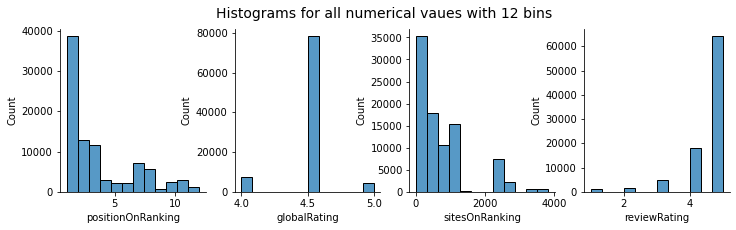

In [173]:
# HISTOGRAM (ALL NUMERIC VARIABLES)

# Identify numeric variables
numerical=['positionOnRanking','globalRating','sitesOnRanking','reviewRating']
# Draw
fig, ax = plt.subplots(1, 4, figsize=(12,3))
for var, subplot in zip(ds_com[numerical], ax.flatten()):
    g = sns.histplot(data=ds_com,
                bins=12,
                 x=var,
                 ax=subplot,
                 kde=False)
# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms for all numerical vaues with 12 bins", fontsize=plots_Title_fontSize);

# Save to file
plt.savefig('MultipleHistogram.svg', bbox_inches="tight")

In [174]:
# splitting the dataset to prepandemic and post pandemic 
import datetime
datetime.datetime.strptime
ds_pre_pandemic=ds_com[ds_com['reviewVisited']<=pd.Timestamp(2020,3,1)]
ds_pre_pandemic.describe(include='all').T

/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_39133/919966153.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds_pre_pandemic.describe(include='all').T
/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_39133/919966153.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds_pre_pandemic.describe(include='all').T
/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_39133/919966153.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_n

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
localID,84486,94,MAG001,8221,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,84486,84272,2021-08-20 08:53:17.336000,2,2021-08-20 08:25:08.284,2021-08-21 16:27:17.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
globalRating,84486.0,NaN,NaN,NaN,NaT,NaT,4.485773,0.180085,4.0,4.5,4.5,4.5,5.0
positionOnRanking,84486.0,NaN,NaN,NaN,NaT,NaT,3.399309,3.100939,1.0,1.0,2.0,5.0,12.0
sitesOnRanking,84486.0,NaN,NaN,NaN,NaT,NaT,756.013908,794.551019,5.0,154.0,484.0,1186.0,3836.0
totalReviews,84486.0,NaN,NaN,NaN,NaT,NaT,42300.905298,43864.462458,5179.0,14608.0,26042.0,51324.0,163828.0
userName,84466,60876,KodoDrummer@KodoDrummer,24,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,84486,12155,"London, UK",15350,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,84486.0,NaN,NaN,NaN,NaT,NaT,452.146036,6624.420548,0.0,20.0,66.0,212.0,607732.0
tripType,84486,6,Couples,29454,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
ds_pandemic=ds_com[ds_com['reviewVisited']>pd.Timestamp(2020,3,1)]
ds_pandemic.describe(include='all').T

/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_39133/2635764454.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds_pandemic.describe(include='all').T
/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_39133/2635764454.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds_pandemic.describe(include='all').T
/var/folders/sj/gv6trfdx4g5btqs0rkx98q8h0000gn/T/ipykernel_39133/2635764454.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeri

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
localID,5518,94,MAG024,649,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,5518,5513,2021-08-20 08:25:45.832000,2,2021-08-20 08:24:40.077,2021-08-21 16:26:47.604,NaN,NaN,NaN,NaN,NaN,NaN,NaN
globalRating,5518.0,NaN,NaN,NaN,NaT,NaT,4.470188,0.180551,4.0,4.5,4.5,4.5,5.0
positionOnRanking,5518.0,NaN,NaN,NaN,NaT,NaT,3.120696,2.766996,1.0,1.0,2.0,4.0,12.0
sitesOnRanking,5518.0,NaN,NaN,NaN,NaT,NaT,477.74266,706.225376,5.0,73.0,188.0,487.0,3836.0
totalReviews,5518.0,NaN,NaN,NaN,NaT,NaT,26260.205328,25149.308132,5179.0,8582.0,18087.0,34703.0,163828.0
userName,5518,4448,KDJERO@KDJERO,9,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,5518,1494,"London, UK",1474,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,5518.0,NaN,NaN,NaN,NaT,NaT,665.295216,11716.616743,1.0,11.0,50.0,191.0,607727.0
tripType,5518,6,Other,2477,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Graphs

#### Histogram of numerical values prepandemic and pandemic 

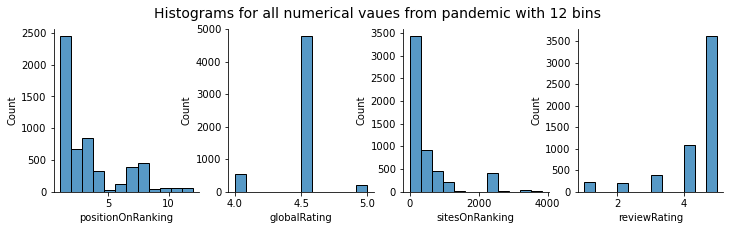

In [176]:
# Identify numeric variables
numerical= ['positionOnRanking','globalRating','sitesOnRanking','reviewRating']
# Draw
fig, ax = plt.subplots(1, 4, figsize=(12,3))
for var, subplot in zip(ds_pandemic[numerical], ax.flatten()):
    g = sns.histplot(data=ds_pandemic,
                bins=12,
                 x=var,
                 ax=subplot,
                 kde=False)
# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms for all numerical vaues from pandemic with 12 bins", fontsize=plots_Title_fontSize);

# Save to file
plt.savefig('MultipleHistogram.svg', bbox_inches="tight")

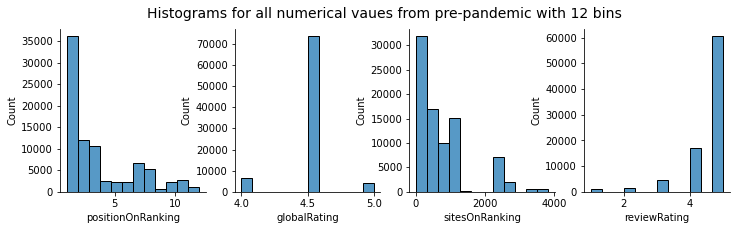

In [177]:
# Draw
fig, ax = plt.subplots(1, 4, figsize=(12,3))
for var, subplot in zip(ds_pre_pandemic[numerical], ax.flatten()):
    g = sns.histplot(data=ds_pre_pandemic,
                bins=12,
                 x=var,
                 ax=subplot,
                 kde=False)
# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms for all numerical vaues from pre-pandemic with 12 bins", fontsize=plots_Title_fontSize);

# Save to file
plt.savefig('MultipleHistogram2.svg', bbox_inches="tight")

#### BOXPLOT (ALL NUMERIC VARIABLES)

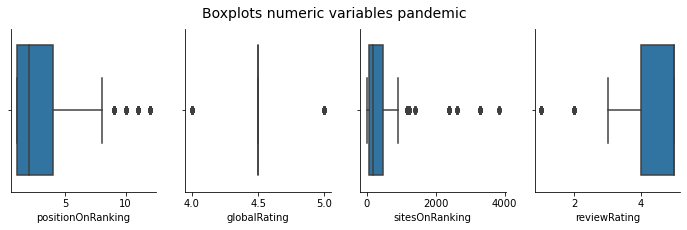

In [178]:
# Draw
fig, ax = plt.subplots(1, 4, figsize=(12,3))
for var, subplot in zip(ds_pandemic[numerical], ax.flatten()):
    g = sns.boxplot(data=ds_pandemic,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots numeric variables pandemic", fontsize=plots_Title_fontSize);

# Save to file
plt.savefig('boxplot1.svg', bbox_inches="tight")

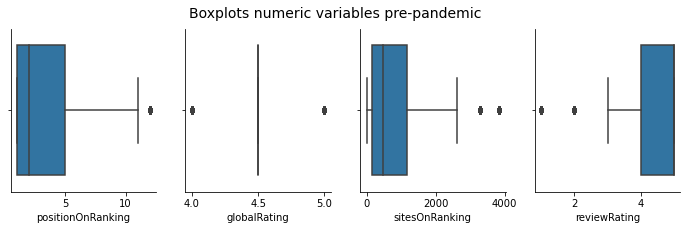

In [179]:
# Draw
fig, ax = plt.subplots(1, 4, figsize=(12,3))
for var, subplot in zip(ds_pre_pandemic[numerical], ax.flatten()):
    g = sns.boxplot(data=ds_pre_pandemic,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots numeric variables pre-pandemic", fontsize=plots_Title_fontSize);

# Save to file
plt.savefig('boxplot2.svg', bbox_inches="tight")

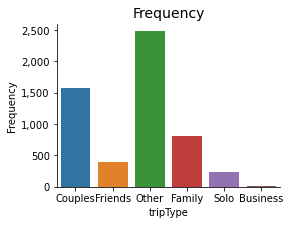

In [180]:
# Frequency of trip type

# Draw
fig, ax = plt.subplots(figsize=(4,3))
g = sns.countplot(data=ds_pandemic, x=ds_pandemic['tripType'])

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Frequency", fontsize=plots_Title_fontSize)
plt.xlabel("tripType")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)

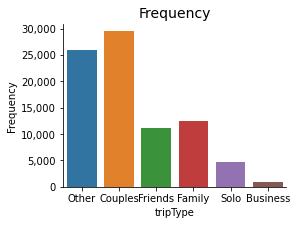

In [181]:
# Frequency of trip type

# Draw
fig, ax = plt.subplots(figsize=(4,3))
g = sns.countplot(data=ds_pre_pandemic, x=ds_pre_pandemic['tripType'])

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Frequency", fontsize=plots_Title_fontSize)
plt.xlabel("tripType")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)

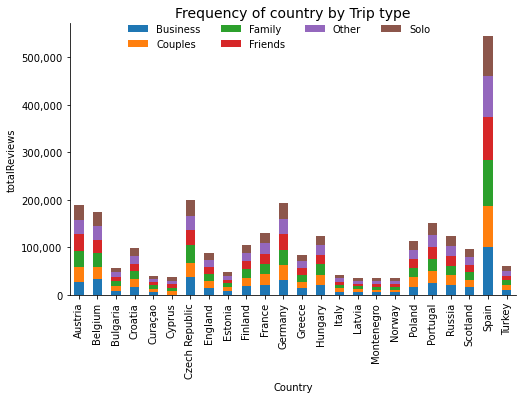

In [182]:
# understanding the frequency by trip type and local ID 

countriesList = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Curaçao', 'Cyprus', 'Czech Republic', 'England', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Italy', 'Latvia', 'Montenegro', 'Norway', 'Poland', 'Portugal', 'Russia', 'Scotland', 'Spain', 'Turkey'] 
# Aggregate and sort
tempDS_pre = ds_pre_pandemic.pivot_table(values=['totalReviews'], 
                      index='Country',
                      columns='tripType',
                      fill_value=0)
# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = tempDS_pre.plot(kind='bar', stacked=True, ax=ax)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Frequency of country by Trip type", fontsize=plots_Title_fontSize)
plt.xlabel("Country")
plt.ylabel("totalReviews")
ax.set_xticklabels(countriesList)
plt.xticks(rotation=90, ha='center')
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
labels = ['Business','Couples', 'Family', 'Friends', 'Other', 'Solo']
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=4, bbox_to_anchor=(0.47, 1.03), frameon=False)

In [183]:
#filtering data by Portugal
countries = ['Portugal']
PT = ds_com[ds_com.Country.isin(countries)]

/Users/katia/opt/anaconda3/lib/python3.9/site-packages/joypy/joyplot.py:435: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig, axes = _subplots(naxes=num_axes, ax=ax, squeeze=False,


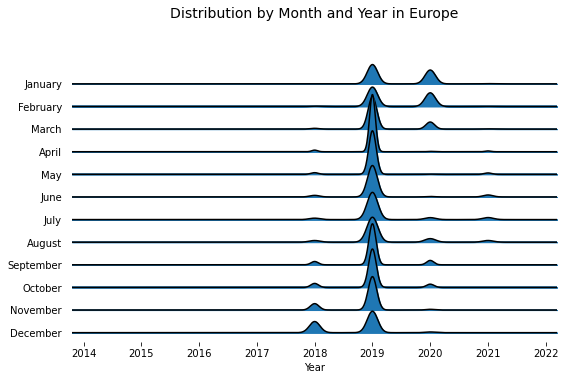

In [184]:
# Sales distribution by month and year filtered out by Europe

# Create columns with Month and Year
ds_com['Month'] = ds_com['reviewVisited'].dt.month
ds_com['Year'] = ds_com['reviewVisited'].dt.year

# Draw
MonthsList = ['January','February','March','April','May','June','July', 'August', 'September', 'October','November', 'December']
fig, ax = plt.subplots(figsize=(8,5))
g = joypy.joyplot(data=ds_com, column='Year', by='Month', labels=MonthsList, ax=ax)

# Decoration
plt.title("Distribution by Month and Year in Europe", fontsize=plots_Title_fontSize)
plt.xlabel("Year")
plt.rc('axes', labelsize=subPlots_label_fontSize)

/Users/katia/opt/anaconda3/lib/python3.9/site-packages/joypy/joyplot.py:435: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig, axes = _subplots(naxes=num_axes, ax=ax, squeeze=False,


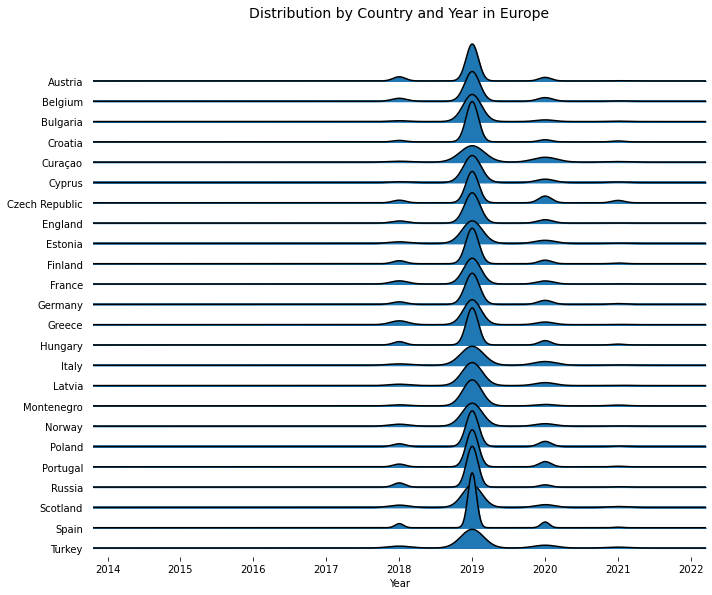

In [185]:
# Distributioon by Country and Year 

# Draw
MonthsList = ['January','February','March','April','May','June','July', 'August', 'September', 'October','November', 'December']
fig, ax = plt.subplots(figsize=(10,8))
g = joypy.joyplot(data=ds_com, column='Year', by='Country', labels=countriesList, ax=ax)

# Decoration
plt.title("Distribution by Country and Year in Europe", fontsize=plots_Title_fontSize)
plt.xlabel("Year")
plt.rc('axes', labelsize=subPlots_label_fontSize)

# Save to file
plt.savefig('distributionEUyear.svg', bbox_inches="tight")

# Modeling

In [186]:
# Create a pivot table
pt_table = pd.pivot_table(PT[['userName','Name']],
                    index= 'userName',                                  # Each row will be a user
                    columns= 'Name',                       # Each product will be an attraction
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)   # The value should be 1 if the product is present in the document, otherwise 0
pt_table.head()

Name,Bom Jesus do Monte,Cais da Ribeira,Mosteiro dos Jeronimos,Park and National Palace of Pena,Ponte de Dom Luís I,Quinta da Regaleira,Torre de Belém
userName,,,,,,,
007JNR@007JNR,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0Garza@0Garza,0.0,0.0,1.0,1.0,0.0,0.0,1.0
101eggie@101eggie,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1104@1104,0.0,0.0,1.0,0.0,0.0,0.0,0.0
110Helen2014@110Helen2014,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [187]:
pt_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3957 entries, 007JNR@007JNR to 桂子 大@_T2961PL
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bom Jesus do Monte                3957 non-null   float64
 1   Cais da Ribeira                   3957 non-null   float64
 2   Mosteiro dos Jeronimos            3957 non-null   float64
 3   Park and National Palace of Pena  3957 non-null   float64
 4   Ponte de Dom Luís I               3957 non-null   float64
 5   Quinta da Regaleira               3957 non-null   float64
 6   Torre de Belém                    3957 non-null   float64
dtypes: float64(7)
memory usage: 247.3+ KB


In [188]:
# Apply the APRIORI algorithm
# Rules supported in at least 5% of the transactions
# More info at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
frequent_itemsets = apriori(pt_table, min_support=0.03, use_colnames=True)

/Users/katia/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [189]:
# Generate the association rules - by support
rulesSupport = association_rules(frequent_itemsets, metric="support", min_threshold=0.03)
rulesSupport.sort_values(by='support', ascending=False, inplace=True)
rulesSupport.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Mosteiro dos Jeronimos),(Torre de Belém),0.277483,0.327774,0.102350,0.368852,1.125327,0.011399,1.065086
5,(Torre de Belém),(Mosteiro dos Jeronimos),0.327774,0.277483,0.102350,0.312259,1.125327,0.011399,1.050566
6,(Quinta da Regaleira),(Park and National Palace of Pena),0.147587,0.254486,0.064190,0.434932,1.709061,0.026631,1.319334
7,(Park and National Palace of Pena),(Quinta da Regaleira),0.254486,0.147587,0.064190,0.252234,1.709061,0.026631,1.139947
2,(Mosteiro dos Jeronimos),(Park and National Palace of Pena),0.277483,0.254486,0.043973,0.158470,0.622707,-0.026643,0.885903
3,(Park and National Palace of Pena),(Mosteiro dos Jeronimos),0.254486,0.277483,0.043973,0.172790,0.622707,-0.026643,0.873439
8,(Park and National Palace of Pena),(Torre de Belém),0.254486,0.327774,0.043720,0.171797,0.524134,-0.039694,0.811669
9,(Torre de Belém),(Park and National Palace of Pena),0.327774,0.254486,0.043720,0.133385,0.524134,-0.039694,0.860260
0,(Ponte de Dom Luís I),(Cais da Ribeira),0.211271,0.076826,0.040435,0.191388,2.491186,0.024204,1.141677
1,(Cais da Ribeira),(Ponte de Dom Luís I),0.076826,0.211271,0.040435,0.526316,2.491186,0.024204,1.665094


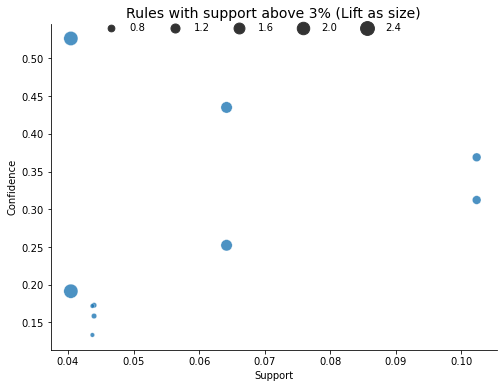

In [190]:
# Scatter plot of these rules

# Draw
fig, ax = plt.subplots(figsize=(8,6))
g = sns.scatterplot(data=rulesSupport, x="support", y="confidence", size="lift", sizes=(20, 200), alpha=0.8)

# Decoration
sns.despine()
plt.title("Rules with support above 3% (Lift as size)", fontsize=plots_Title_fontSize)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=6, bbox_to_anchor=(0.45, 1.03), frameon=False)

In [191]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.03)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Cais da Ribeira),(Ponte de Dom Luís I),0.076826,0.211271,0.040435,0.526316,2.491186,0.024204,1.665094
6,(Quinta da Regaleira),(Park and National Palace of Pena),0.147587,0.254486,0.064190,0.434932,1.709061,0.026631,1.319334
4,(Mosteiro dos Jeronimos),(Torre de Belém),0.277483,0.327774,0.102350,0.368852,1.125327,0.011399,1.065086
5,(Torre de Belém),(Mosteiro dos Jeronimos),0.327774,0.277483,0.102350,0.312259,1.125327,0.011399,1.050566
7,(Park and National Palace of Pena),(Quinta da Regaleira),0.254486,0.147587,0.064190,0.252234,1.709061,0.026631,1.139947
0,(Ponte de Dom Luís I),(Cais da Ribeira),0.211271,0.076826,0.040435,0.191388,2.491186,0.024204,1.141677
3,(Park and National Palace of Pena),(Mosteiro dos Jeronimos),0.254486,0.277483,0.043973,0.172790,0.622707,-0.026643,0.873439
8,(Park and National Palace of Pena),(Torre de Belém),0.254486,0.327774,0.043720,0.171797,0.524134,-0.039694,0.811669
2,(Mosteiro dos Jeronimos),(Park and National Palace of Pena),0.277483,0.254486,0.043973,0.158470,0.622707,-0.026643,0.885903
9,(Torre de Belém),(Park and National Palace of Pena),0.327774,0.254486,0.043720,0.133385,0.524134,-0.039694,0.860260


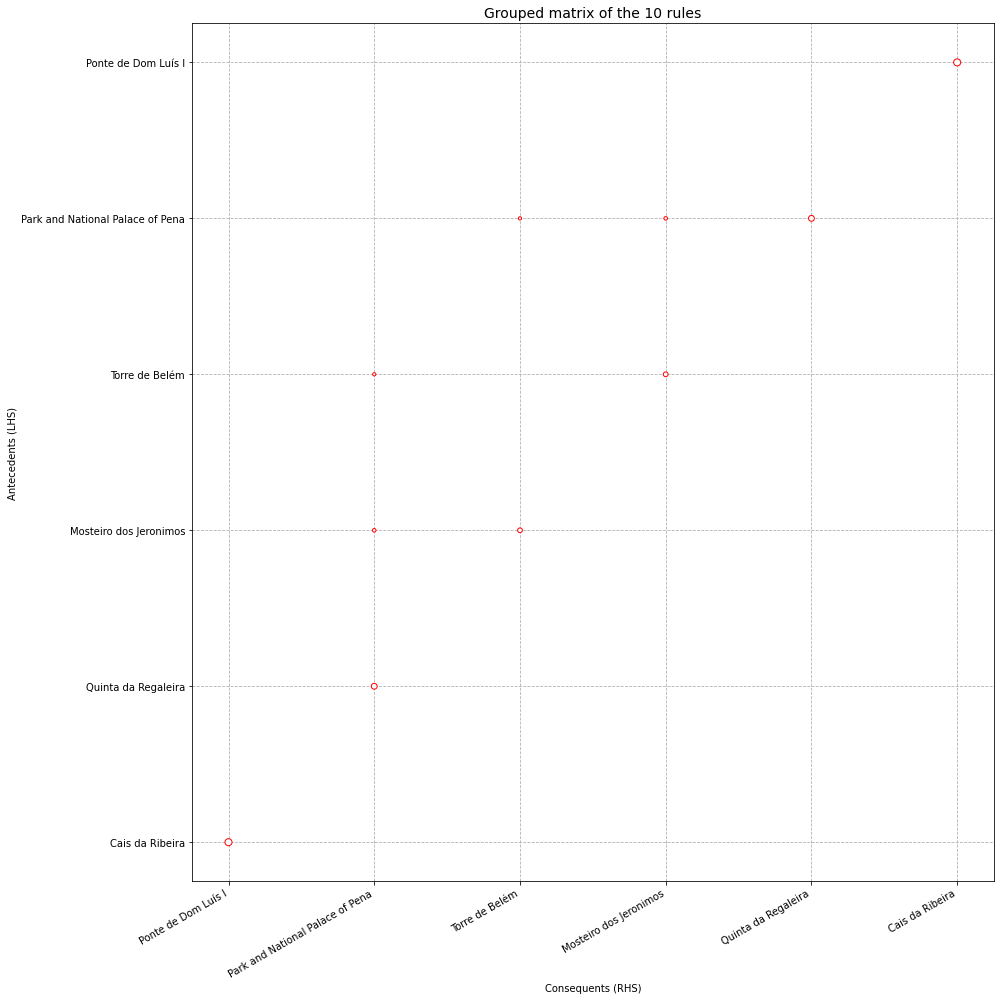

In [239]:
# Bubble plot of the rules

# Replace frozen sets with strings
rulesConfidence['antecedents_'] = rulesConfidence['antecedents'].apply(lambda a: ','.join(list(a)))
rulesConfidence['consequents_'] = rulesConfidence['consequents'].apply(lambda a: ','.join(list(a)))

# Draw
fig, ax = plt.subplots(figsize=(14,14))
ax= plt.scatter(data=rulesConfidence, x='consequents_', y='antecedents_', s = rulesConfidence['lift']*20, edgecolors = "red", c = "white", zorder = 2)

# Decoration
nRules=rulesConfidence.shape[0]
plt.title(f"Grouped matrix of the {nRules} rules", fontsize=plots_Title_fontSize)
plt.xlabel("Consequents (RHS)")
plt.ylabel("Antecedents (LHS)")
plt.grid(ls = "--", zorder = 1)
fig.autofmt_xdate()
plt.tight_layout()
# Save to file
plt.savefig('bubbleplot.svg', bbox_inches="tight")

In [193]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Ponte de Dom Luís I),(Cais da Ribeira),0.211271,0.076826,0.040435,0.191388,2.491186,0.024204,1.141677
1,(Cais da Ribeira),(Ponte de Dom Luís I),0.076826,0.211271,0.040435,0.526316,2.491186,0.024204,1.665094
7,(Park and National Palace of Pena),(Quinta da Regaleira),0.254486,0.147587,0.064190,0.252234,1.709061,0.026631,1.139947
6,(Quinta da Regaleira),(Park and National Palace of Pena),0.147587,0.254486,0.064190,0.434932,1.709061,0.026631,1.319334
4,(Mosteiro dos Jeronimos),(Torre de Belém),0.277483,0.327774,0.102350,0.368852,1.125327,0.011399,1.065086
5,(Torre de Belém),(Mosteiro dos Jeronimos),0.327774,0.277483,0.102350,0.312259,1.125327,0.011399,1.050566
2,(Mosteiro dos Jeronimos),(Park and National Palace of Pena),0.277483,0.254486,0.043973,0.158470,0.622707,-0.026643,0.885903
3,(Park and National Palace of Pena),(Mosteiro dos Jeronimos),0.254486,0.277483,0.043973,0.172790,0.622707,-0.026643,0.873439
8,(Park and National Palace of Pena),(Torre de Belém),0.254486,0.327774,0.043720,0.171797,0.524134,-0.039694,0.811669
9,(Torre de Belém),(Park and National Palace of Pena),0.327774,0.254486,0.043720,0.133385,0.524134,-0.039694,0.860260


## Explore frequent itemsets

In [194]:
# Add a column with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [195]:
# Length=2 and Support>=0.1
frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.03)]

,support,itemsets,length
7,0.040435,"(Ponte de Dom Luís I, Cais da Ribeira)",2
8,0.043973,"(Mosteiro dos Jeronimos, Park and National Pal...",2
9,0.102350,"(Mosteiro dos Jeronimos, Torre de Belém)",2
10,0.064190,"(Quinta da Regaleira, Park and National Palace...",2
11,0.043720,"(Park and National Palace of Pena, Torre de Be...",2


In [196]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.3) & (rulesConfidence['lift'] >= 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_,consequents_
1,(Cais da Ribeira),(Ponte de Dom Luís I),0.076826,0.211271,0.040435,0.526316,2.491186,0.024204,1.665094,Cais da Ribeira,Ponte de Dom Luís I
6,(Quinta da Regaleira),(Park and National Palace of Pena),0.147587,0.254486,0.064190,0.434932,1.709061,0.026631,1.319334,Quinta da Regaleira,Park and National Palace of Pena
4,(Mosteiro dos Jeronimos),(Torre de Belém),0.277483,0.327774,0.102350,0.368852,1.125327,0.011399,1.065086,Mosteiro dos Jeronimos,Torre de Belém
5,(Torre de Belém),(Mosteiro dos Jeronimos),0.327774,0.277483,0.102350,0.312259,1.125327,0.011399,1.050566,Torre de Belém,Mosteiro dos Jeronimos


One can say, based on Lift, that if someone has visted Cais da Ribeira there is a likely hood that will go to Ponte de Dom Luís I

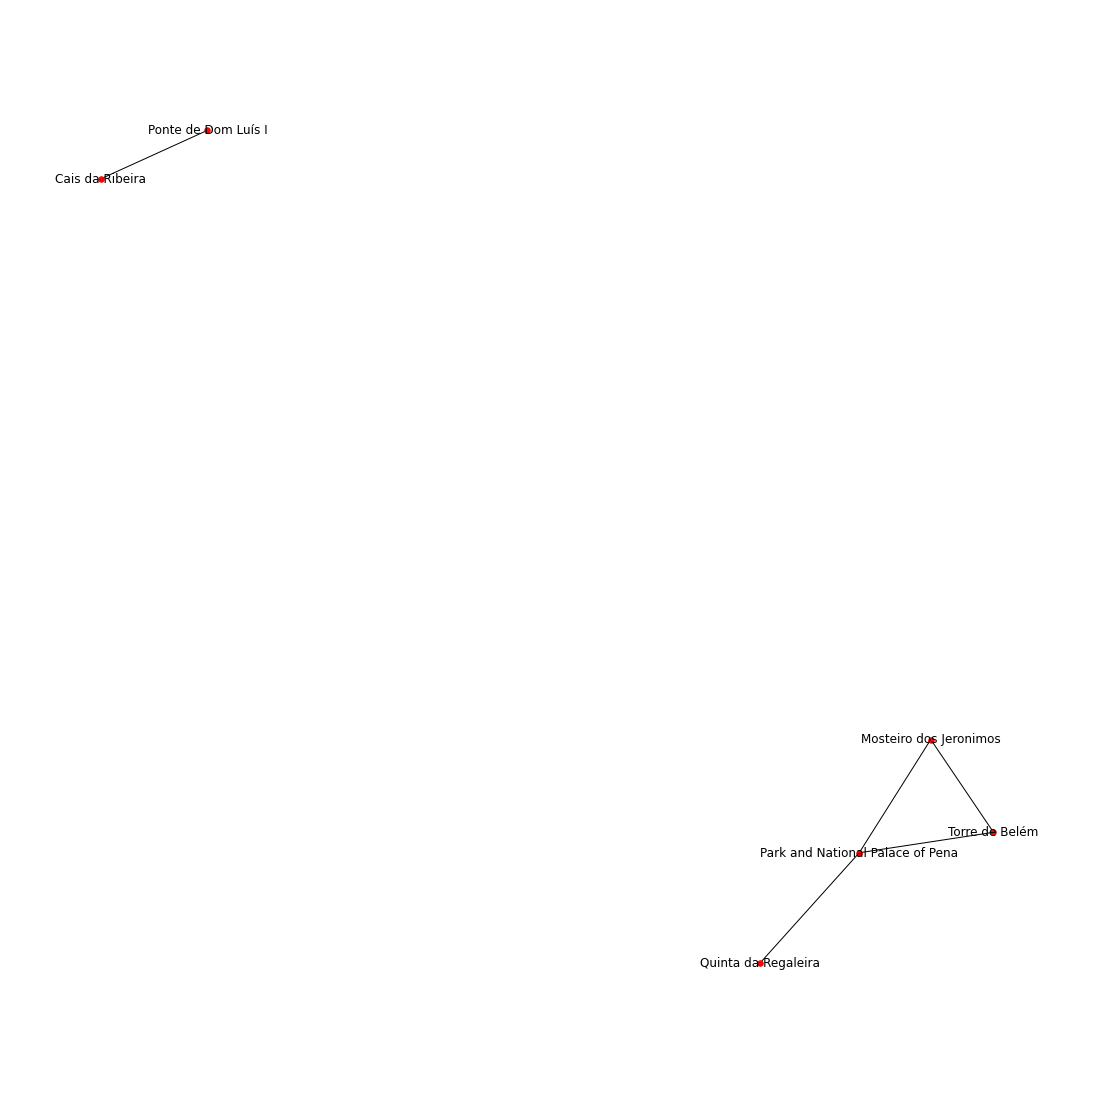

<Figure size 432x288 with 0 Axes>

In [241]:
# Plot a basic network graph of the top 5 confidence rules

# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]

# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)

# Plot
rulesToPlot=rulesToPlot[:5]
fig = plt.figure(figsize=(15, 15)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
np.random.seed(1234)
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()
# Save to file
plt.savefig('network.svg')

# MBA analysis different combination

In [220]:
# Create a pivot table
pt_table_tt = pd.pivot_table(PT[['userLocation','Name']],
                    index= 'userLocation',                                  # Each row will be trip type
                    columns= 'Name',                                        # Each product will be an attraction
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)       # The value should be 1 if the product is present in the document, otherwise 0
pt_table_tt.head()

Name,Bom Jesus do Monte,Cais da Ribeira,Mosteiro dos Jeronimos,Park and National Palace of Pena,Ponte de Dom Luís I,Quinta da Regaleira,Torre de Belém
userLocation,,,,,,,
34645,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ATLANTA GA,0.0,0.0,0.0,0.0,1.0,0.0,1.0
"AUCKLAND, NEW ZEALAND",0.0,0.0,0.0,0.0,1.0,0.0,0.0
"Aalborg, Denmark",0.0,0.0,1.0,1.0,1.0,0.0,1.0
"Aarhus, Denmark",1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [221]:
# Apply the APRIORI algorithm
# Rules supported in at least 5% of the transactions
# More info at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
frequent_itemsets_tt = apriori(pt_table_tt, min_support=0.03, use_colnames=True)

/Users/katia/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [223]:
# Generate the association rules - by support
rulesSupport_tt = association_rules(frequent_itemsets_tt, metric="support", min_threshold=0.10)
rulesSupport_tt.sort_values(by='support', ascending=False, inplace=True)
rulesSupport_tt.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Mosteiro dos Jeronimos),(Torre de Belém),0.363851,0.437094,0.202599,0.556818,1.273910,0.043562,1.270147
5,(Torre de Belém),(Mosteiro dos Jeronimos),0.437094,0.363851,0.202599,0.463514,1.273910,0.043562,1.185769
8,(Park and National Palace of Pena),(Torre de Belém),0.339043,0.437094,0.141760,0.418118,0.956587,-0.006433,0.967389
9,(Torre de Belém),(Park and National Palace of Pena),0.437094,0.339043,0.141760,0.324324,0.956587,-0.006433,0.978216
0,(Mosteiro dos Jeronimos),(Park and National Palace of Pena),0.363851,0.339043,0.130538,0.358766,1.058173,0.007176,1.030758
1,(Park and National Palace of Pena),(Mosteiro dos Jeronimos),0.339043,0.363851,0.130538,0.385017,1.058173,0.007176,1.034418
6,(Quinta da Regaleira),(Park and National Palace of Pena),0.210278,0.339043,0.130538,0.620787,1.830996,0.059244,1.742968
7,(Park and National Palace of Pena),(Quinta da Regaleira),0.339043,0.210278,0.130538,0.385017,1.830996,0.059244,1.284138
10,(Ponte de Dom Luís I),(Torre de Belém),0.294743,0.437094,0.110455,0.374749,0.857366,-0.018376,0.900289
11,(Torre de Belém),(Ponte de Dom Luís I),0.437094,0.294743,0.110455,0.252703,0.857366,-0.018376,0.943743


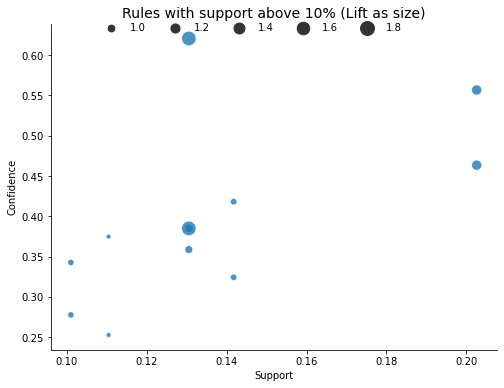

In [224]:
# Scatter plot of these rules

# Draw
fig, ax = plt.subplots(figsize=(8,6))
g = sns.scatterplot(data=rulesSupport_tt, x="support", y="confidence", size="lift", sizes=(20, 200), alpha=0.8)

# Decoration
sns.despine()
plt.title("Rules with support above 10% (Lift as size)", fontsize=plots_Title_fontSize)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=6, bbox_to_anchor=(0.45, 1.03), frameon=False)

In [228]:
# Generate the association rules - by confidence
rulesConfidence_tt = association_rules(frequent_itemsets_tt, metric="confidence", min_threshold=0.4)
rulesConfidence_tt.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence_tt.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
87,"(Mosteiro dos Jeronimos, Ponte de Dom Luís I, ...",(Park and National Palace of Pena),0.047844,0.339043,0.044891,0.938272,2.767411,0.028670,10.707501
143,"(Quinta da Regaleira, Ponte de Dom Luís I, Tor...",(Park and National Palace of Pena),0.043709,0.339043,0.040756,0.932432,2.750188,0.025937,9.782162
111,"(Mosteiro dos Jeronimos, Ponte de Dom Luís I, ...",(Torre de Belém),0.047844,0.437094,0.043709,0.913580,2.090123,0.022797,6.513628
129,"(Mosteiro dos Jeronimos, Ponte de Dom Luís I, ...",(Torre de Belém),0.033668,0.437094,0.030715,0.912281,2.087150,0.015999,6.417129
66,"(Mosteiro dos Jeronimos, Park and National Pal...",(Torre de Belém),0.040165,0.437094,0.036621,0.911765,2.085970,0.019065,6.379602
144,"(Quinta da Regaleira, Ponte de Dom Luís I, Par...",(Torre de Belém),0.044891,0.437094,0.040756,0.907895,2.077116,0.021135,6.111552
130,"(Park and National Palace of Pena, Ponte de Do...",(Mosteiro dos Jeronimos),0.034259,0.363851,0.030715,0.896552,2.464062,0.018250,6.149439
29,"(Quinta da Regaleira, Cais da Ribeira)",(Torre de Belém),0.036621,0.437094,0.032487,0.887097,2.029534,0.016480,4.985740
68,"(Park and National Palace of Pena, Cais da Rib...",(Mosteiro dos Jeronimos),0.041347,0.363851,0.036621,0.885714,2.434276,0.021577,5.566302
145,"(Quinta da Regaleira, Ponte de Dom Luís I, Par...",(Mosteiro dos Jeronimos),0.046072,0.363851,0.040756,0.884615,2.431256,0.023993,5.513290


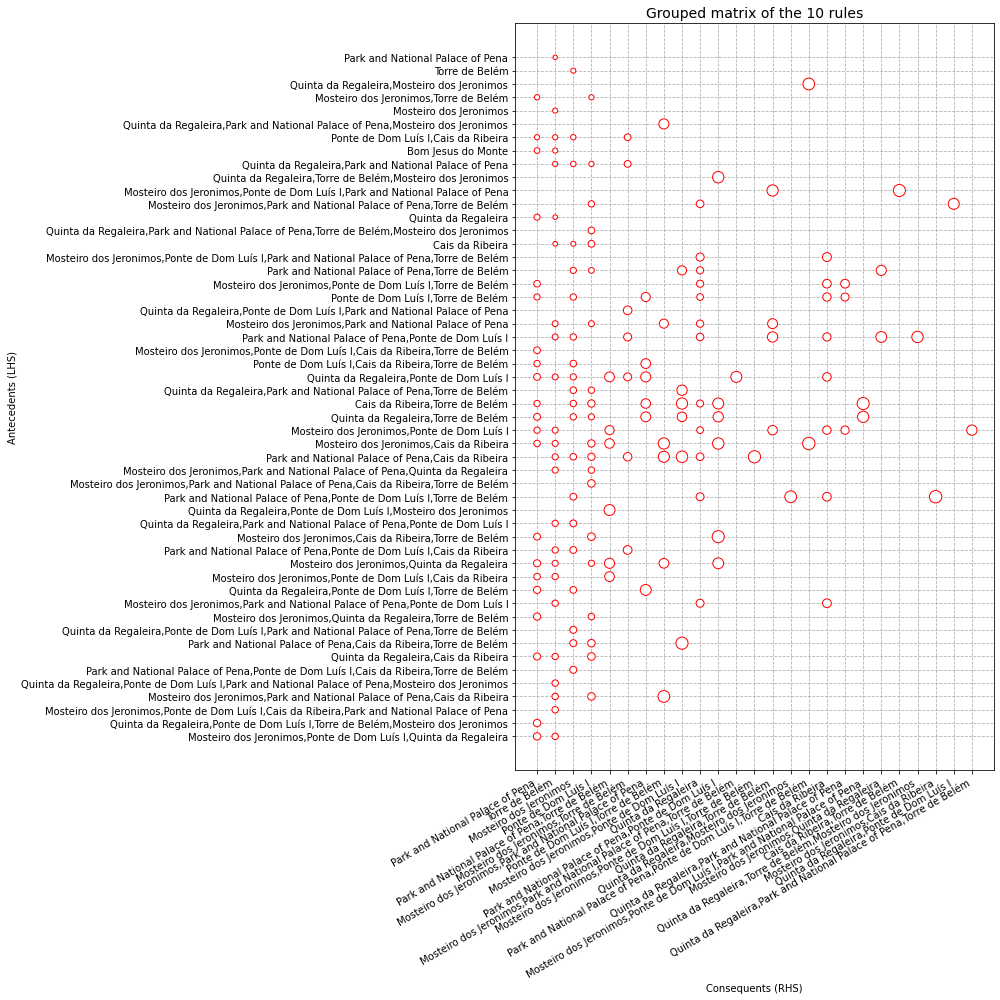

In [229]:
# Bubble plot of the rules

# Replace frozen sets with strings
rulesConfidence_tt['antecedents_'] = rulesConfidence_tt['antecedents'].apply(lambda a: ','.join(list(a)))
rulesConfidence_tt['consequents_'] = rulesConfidence_tt['consequents'].apply(lambda a: ','.join(list(a)))

# Draw
fig, ax = plt.subplots(figsize=(14,14))
ax= plt.scatter(data=rulesConfidence_tt, x='consequents_', y='antecedents_', s = rulesConfidence_tt['lift']*20, edgecolors = "red", c = "white", zorder = 2)

# Decoration
nRules_tt=rulesConfidence_tt.shape[0]
plt.title(f"Grouped matrix of the {nRules} rules", fontsize=plots_Title_fontSize)
plt.xlabel("Consequents (RHS)")
plt.ylabel("Antecedents (LHS)")
plt.grid(ls = "--", zorder = 1)
fig.autofmt_xdate()
plt.tight_layout()

In [237]:
# Generate the association rules - by lift
rulesLift_tt = association_rules(frequent_itemsets_tt, metric="lift", min_threshold=1.5)
rulesLift_tt.sort_values(by='lift', ascending=False, inplace=True)
rulesLift_tt.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
240,"(Park and National Palace of Pena, Ponte de Do...","(Mosteiro dos Jeronimos, Cais da Ribeira)",0.070289,0.056704,0.030715,0.436975,7.706232,0.026729,1.675406
253,"(Mosteiro dos Jeronimos, Cais da Ribeira)","(Park and National Palace of Pena, Ponte de Do...",0.056704,0.070289,0.030715,0.541667,7.706232,0.026729,2.028459
256,"(Park and National Palace of Pena, Cais da Rib...","(Mosteiro dos Jeronimos, Ponte de Dom Luís I, ...",0.050797,0.081512,0.030715,0.604651,7.417931,0.026574,2.323234
237,"(Mosteiro dos Jeronimos, Ponte de Dom Luís I, ...","(Park and National Palace of Pena, Cais da Rib...",0.081512,0.050797,0.030715,0.376812,7.417931,0.026574,1.523139
247,"(Mosteiro dos Jeronimos, Ponte de Dom Luís I)","(Park and National Palace of Pena, Cais da Rib...",0.101004,0.041347,0.030715,0.304094,7.354720,0.026539,1.377561
246,"(Park and National Palace of Pena, Cais da Rib...","(Mosteiro dos Jeronimos, Ponte de Dom Luís I)",0.041347,0.101004,0.030715,0.742857,7.354720,0.026539,3.496095
255,"(Cais da Ribeira, Torre de Belém)","(Mosteiro dos Jeronimos, Ponte de Dom Luís I, ...",0.062020,0.067927,0.030715,0.495238,7.290766,0.026502,1.846560
238,"(Mosteiro dos Jeronimos, Ponte de Dom Luís I, ...","(Cais da Ribeira, Torre de Belém)",0.067927,0.062020,0.030715,0.452174,7.290766,0.026502,1.712186
244,"(Mosteiro dos Jeronimos, Cais da Ribeira, Torr...","(Park and National Palace of Pena, Ponte de Do...",0.046072,0.091553,0.030715,0.666667,7.281720,0.026497,2.725340
249,"(Park and National Palace of Pena, Ponte de Do...","(Mosteiro dos Jeronimos, Cais da Ribeira, Torr...",0.091553,0.046072,0.030715,0.335484,7.281720,0.026497,1.435523


### Explore frequent items

In [231]:
# Add a column with the length
frequent_itemsets_tt['length'] = frequent_itemsets_tt['itemsets'].apply(lambda x: len(x))

In [232]:
# Length=2 and Support>=0.1
frequent_itemsets_tt[(frequent_itemsets_tt['length'] == 2) & (frequent_itemsets_tt['support'] >= 0.05)]

,support,itemsets,length
9,0.056704,"(Mosteiro dos Jeronimos, Cais da Ribeira)",2
10,0.050797,"(Park and National Palace of Pena, Cais da Rib...",2
11,0.087419,"(Ponte de Dom Luís I, Cais da Ribeira)",2
13,0.062020,"(Cais da Ribeira, Torre de Belém)",2
14,0.130538,"(Mosteiro dos Jeronimos, Park and National Pal...",2
15,0.101004,"(Mosteiro dos Jeronimos, Ponte de Dom Luís I)",2
16,0.083875,"(Mosteiro dos Jeronimos, Quinta da Regaleira)",2
17,0.202599,"(Mosteiro dos Jeronimos, Torre de Belém)",2
18,0.091553,"(Park and National Palace of Pena, Ponte de Do...",2
19,0.130538,"(Quinta da Regaleira, Park and National Palace...",2


In [235]:
# High Confidence and high Lift
rulesConfidence_tt[(rulesConfidence_tt['confidence'] >= 0.9) & (rulesConfidence_tt['lift'] >=4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_,consequents_


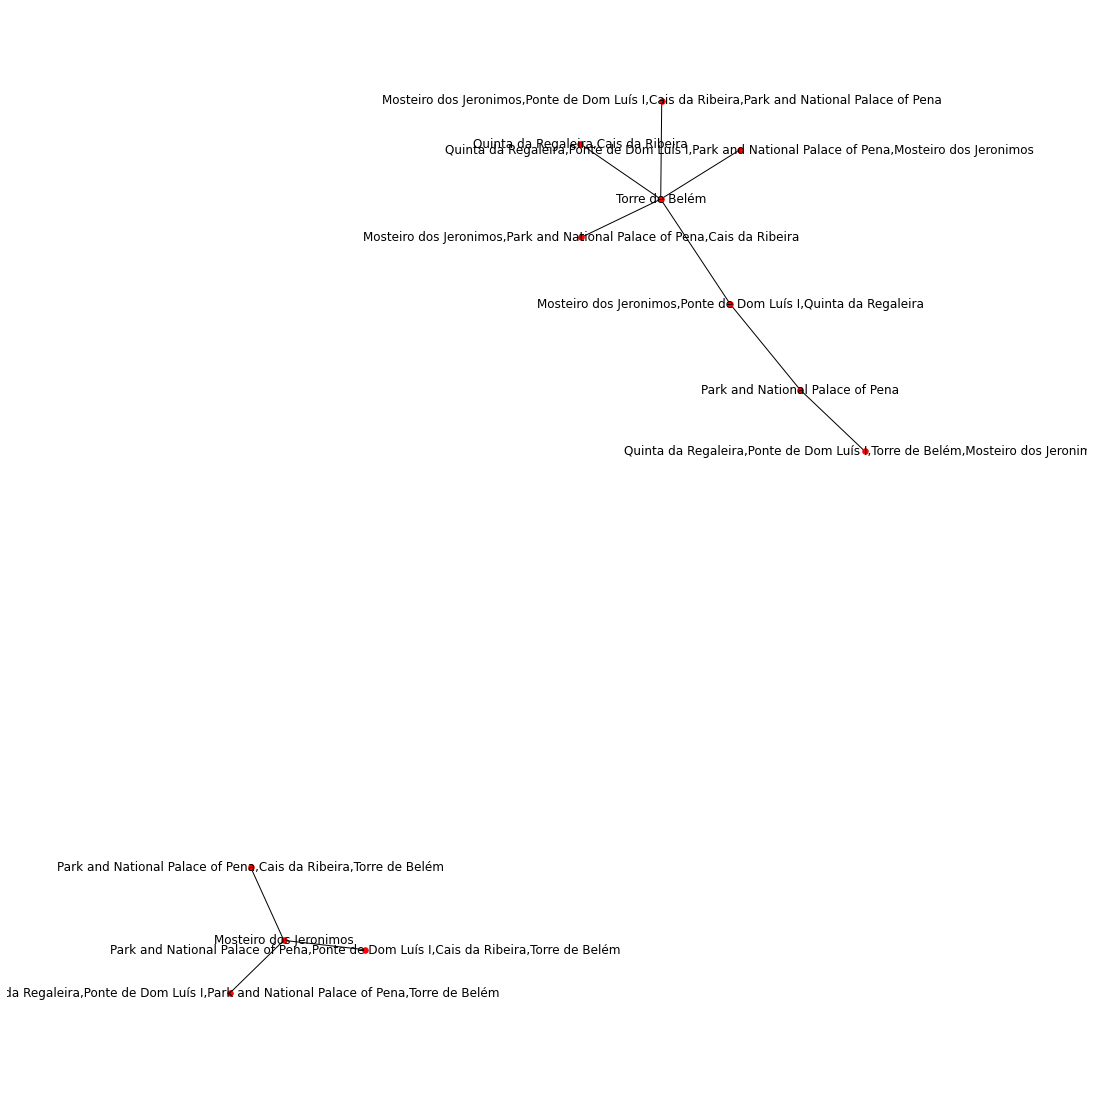

In [238]:
# Plot a basic network graph of the top 10 confidence rules

# Create a copy of the rules and transform the frozensets to strings
rulesToPlot_tt = rulesConfidence_tt.copy(deep=True)
rulesToPlot_tt['LHS'] = [','.join(list(x)) for x in rulesToPlot_tt['antecedents']]
rulesToPlot_tt['RHS'] = [','.join(list(x)) for x in rulesToPlot_tt['consequents']]

# Remove duplicate if reversed rules
rulesToPlot_tt['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot_tt.LHS, rulesToPlot_tt.RHS)]
rulesToPlot_tt['sortedRow'] = rulesToPlot_tt['sortedRow'].astype(str)
rulesToPlot_tt.drop_duplicates(subset=['sortedRow'], inplace=True)

# Plot
rulesToPlot_tt=rulesToPlot_tt[:10]
fig = plt.figure(figsize=(15, 15)) 
G = nx.from_pandas_edgelist(rulesToPlot_tt, 'LHS', 'RHS')
np.random.seed(1234)
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()